1. import libs + load data

In [23]:
import pandas as pd

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [24]:
# Read dataset locally (offline)
df = pd.read_csv("salary.csv")
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [25]:
# Remove outliers using IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Salary'] >= (Q1 - 1.5*IQR)) & (df['Salary'] <= (Q3 + 1.5*IQR))]

In [26]:
# Check Data Shape 
df[['Experience Years']].shape

(40, 1)

2. Basic EDA

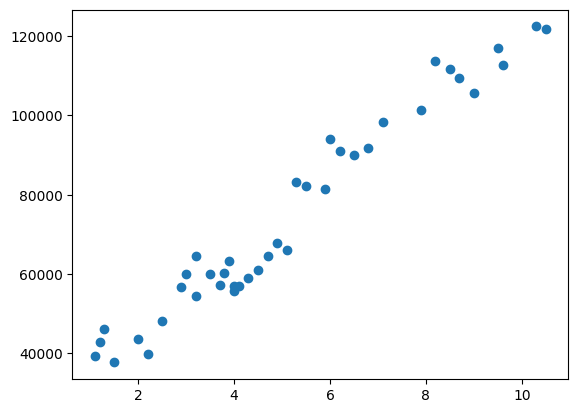

In [27]:
import matplotlib.pyplot as plt 

# Draw plot of Exprerince & Respective Salary
plt.scatter(df[['Experience Years']], df[["Salary"]])

3. Train test split

In [28]:
from sklearn.model_selection import train_test_split

X = df[['Experience Years']]
y = df[['Salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [29]:
# input Training Data

X_train

,Experience Years
39,10.5
6,2.5
25,5.9
9,3.2
13,3.8
31,7.9
34,8.7
8,3.0
17,4.1
24,5.5


In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [31]:
# Create pipeline with polynomial features and scaling
model = Pipeline([
    ('poly', PolynomialFeatures(degree=5)),  # Cubic relationship
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

In [32]:
# Change the last step to:
('linear', Ridge(alpha=0.1))

('linear', Ridge(alpha=0.1))

In [33]:
model.fit(X_train, y_train) # Model Trained Successfully

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('scaler', StandardScaler()), ('linear', LinearRegression())])

5. Prediction and Evaluation

In [34]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)

print("Accuracy: ", r2_score(y_test, y_pred))
print("MEAN Square Error: ", mean_squared_error(y_test, y_pred))

Accuracy:  0.9407856639310268
MEAN Square Error:  30564981.584522236


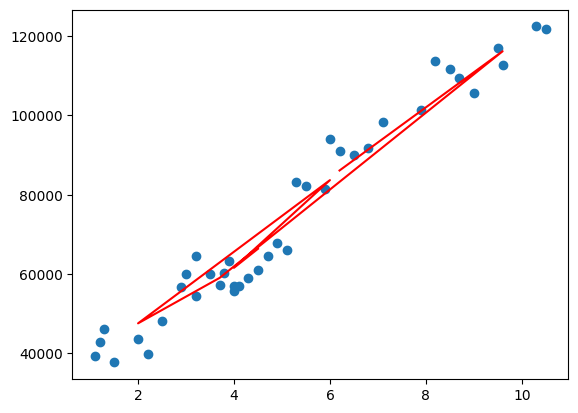

In [35]:
plt.scatter(X,y)
plt.plot(X_test, y_pred, color='red')

In [36]:
# Get the linear regression model from the pipeline
linear_model = model.named_steps['linear']

# y = m * x + c
m = linear_model.coef_
c = linear_model.intercept_
x = 3.4  # new input
y = m * x + c

print(f"Predicted Salary for {x} years of experience: {y[0][0]:.2f}")

Predicted Salary for 3.4 years of experience: 75549.81


## Make Model For Deployment 

In [37]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)